Introduction to Tabular data

In [14]:
# Importing the libraries
# OS library is used to interact with os file system. It helps in creating new directory and save visualizations that we have created with the help of python.
import os

# pandas -> used to read and interpret csv file
import pandas as pd

# numpy -> to convert data from csv to array or other required formats
import numpy as np

# seaborn -> uses Matplotlib to plot graphs from the datas. Used to visualize random distributions.
import seaborn as sns

# matplotlib -> to visualize and plot data
import matplotlib.pyplot as plt

In [24]:
# pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

# pd.read_csv('/Users/shubhamk/Documents/GitHub/Astronomical_Visualization/cleaned_star_data.csv')

#Storing data in variable star_df
star_df = pd.read_csv('https://raw.githubusercontent.com/Shubham91999/Astronomical_Visualization/main/cleaned_star_data.csv')

#To check the datatype of returned result
type(pd.read_csv('https://raw.githubusercontent.com/Shubham91999/Astronomical_Visualization/main/cleaned_star_data.csv'))

#head() is used to return first 5 rows of the result set
star_df.head()

#sample() is used to analyze the random rows from dataset, here 10 rows are selected randomly
star_df.sample(10)

#Checking general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [25]:
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [16]:
star_df.sample(10)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
100,33300,240000.000000,12.00000,-6.500,4,Blue,B
200,16790,0.001400,0.01210,12.870,2,Blue,B
189,3523,0.000957,0.12900,16.350,0,Red,M
88,13720,0.000180,0.00892,12.970,2,White,F
80,7100,0.000290,0.01200,14.090,2,Yellow-White,F
185,2889,0.000352,0.09730,16.930,0,Red,M
61,3432,0.000670,0.19000,16.940,0,Red,M
216,9320,29.000000,1.91000,1.236,3,Blue-White,A
167,26373,198000.000000,39.00000,-5.830,4,Blue,O
119,3780,200000.000000,1324.00000,-10.700,5,Red,M


# Obervation

From above information we can say that, the dataset has 240 rows, 6 features and 1 target column.

* Features:
1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color
6. Spectral Class

* Target Column:
Star Type 

Here,
1. Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
2. Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

* Two Categorical features which will need some kind of encoding
1. Star Color
2. Spectral Class

* Information on the star type is given below:
1. 0 -> Brown Dwarf
2. 1 -> Red Dwarf
3. 2 -> White Dwarf
4. 3 -> Main Sequence
5. 4 -> Supergiants
6. 5 -> Hypergiants






# Creating a directory to save the visualizations



In [17]:
#Create a directory to save visualization
folder_name  = 'star_plots'

#Using makedirs functionality of os to create new directory
os.makedirs(folder_name, exist_ok=True)

base_dir = f'/Users/shubhamk/Documents/GitHub/Astronomical_Visualization/{folder_name}/'



# Creating First Visualization

In [18]:
#Bar Chart for visualizing count of stars with respective type

#Accessing column Star Type from data set
star_df['Star type']

#Counting the number of stars for each type with value_counts()
star_df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

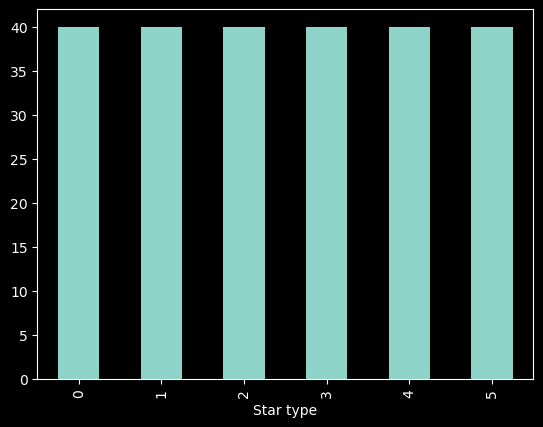

In [19]:
#Using plot from matplotlib to plot the bar chart 
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

# Customizing and Saving the plot


We will take care of following points to make bar chart more informative and attractive.

* Adjust the size of the figure according to your convinience
* Add the value of counts on top of bars
* Set the background to dark
* Change the color of each bar
* Add a title
* Add y label and change color of y ticks
* Replace x ticks from 0,1,2,3,4,5 to respective names of star type
* Save the plots in base directory

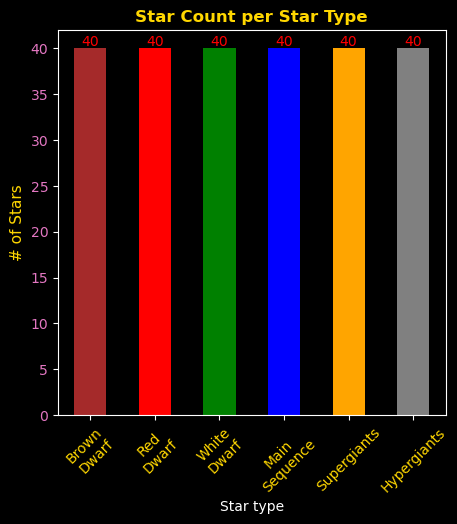

In [30]:
#Customizing the plot

#Adjusting size of plot
plt.figure(figsize=(5,5))


#Setting the background
plt.style.use('dark_background')
#plt.style.use('default')
 
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'green', 'blue', 'orange', 'gray'])

#Adding labels on top of bars
ax.bar_label(ax.containers[0], color = 'red')

#Adding plot title
plt.title('Star Count per Star Type', color = 'gold', weight='bold')

#Adding color to yticks
plt.yticks(color='tab:pink')

#Adding y label
plt.ylabel('# of Stars', color='gold', fontsize= 11)

#Replacing x ticks with labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Brown\nDwarf',
'Red\nDwarf',
'White\nDwarf',
'Main\nSequence',
'Supergiants',
'Hypergiants'], rotation=45, color='gold')

#Saving figure as a image file
plt.savefig(base_dir+'barplot_star_count.png')

plt.show()

# Bar Graph using Seaborn

In [21]:
#Reading Star Color data
print(star_df['Star color'].value_counts().index)

star_df['Star color'].value_counts()

Index(['Red', 'Blue', 'Blue-White', 'Yellow-White', 'White'], dtype='object', name='Star color')


Star color
Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: count, dtype: int64

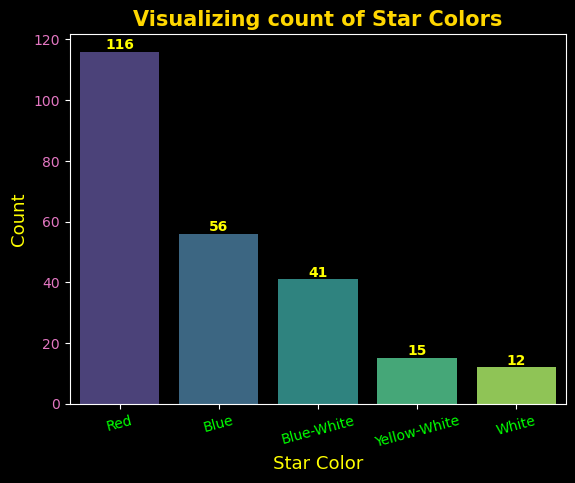

In [32]:
#Visualizing Star Color data with Seaborn and matplotlib
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')

ax.bar_label(ax.containers[0], color='yellow', weight='bold')

plt.title('Visualizing count of Star Colors', fontsize=15, weight='bold', color='gold')

plt.xticks(rotation=15, color='lime')
plt.yticks(color='tab:pink')

plt.xlabel('Star Color', color='Yellow', fontsize=13)
plt.ylabel('Count', color='Yellow', fontsize=13)

plt.savefig(base_dir+'Visualize_star_colors.png')

#plt.show() is used to remove axis labels. 
#Matplotlib makes it easier to to do things like changing plot title, tick labels and adding a legend.
plt.show()

# Visualizing Outliers

Boxplots are usually used to visualize outliers in the data.


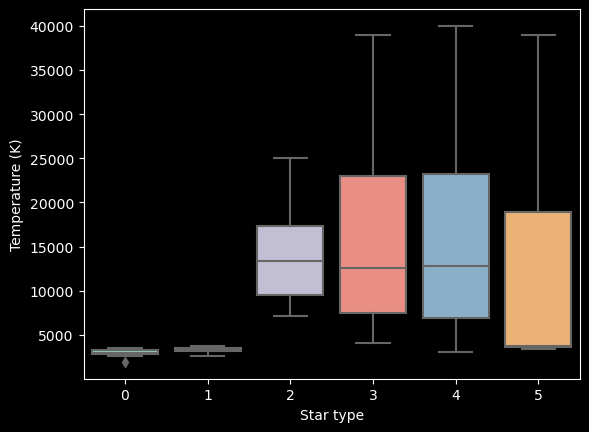

In [33]:
#Visualize outliers in the data
#Showing outilers in numercial column Temperature with respect to the categorical caloumn Star Type
sns.boxplot(x=star_df['Star type'],
            y=star_df.iloc[:, 0])
plt.show()

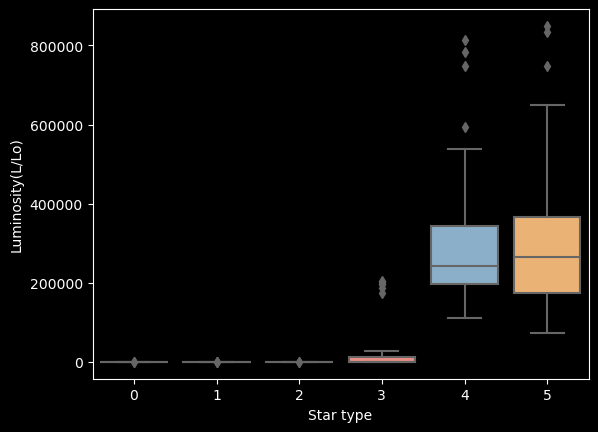

In [35]:
#Visualizing outliers in feature Luminosity with respect to Star Type
sns.boxplot(x=star_df['Star type'],
            y=star_df.iloc[:, 1])
plt.show()

Similarily, we can show the outliers in other two numerical features with the help of iloc function in loop

In [45]:
#Accessing the column names of our data
star_df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

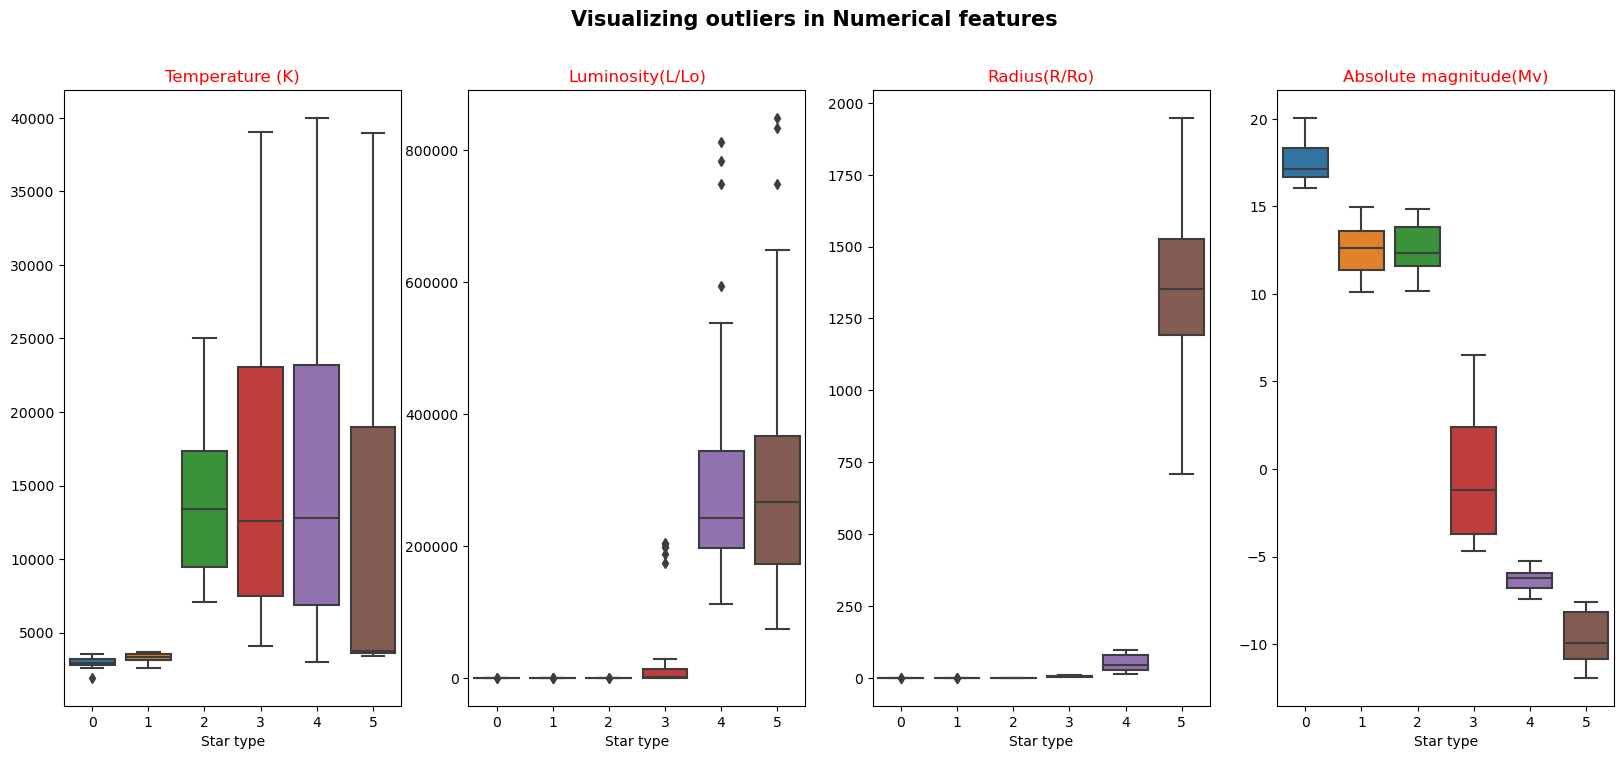

In [50]:
#Here we have used for loop to access first four numercial features of the data. 
#Sublot function of matplotlib is used to integrate four different plot in one figure

#Changing plots style to default from dark 
plt.style.use('default')
#Changing size of plot to adust four subplots 
plt.figure(figsize=(20,8))
#Gave title to the entire plot
plt.suptitle('Visualizing outliers in Numerical features', weight='bold', fontsize = 15)

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=star_df['Star type'],
                          y=star_df.iloc[:, i])
    plt.title(star_df.columns[i], color='red')
    plt.ylabel('')

plt.savefig(base_dir+'boxplot_StarType.png')
    


From the above figure, we can get information about outliers in numerical features. As we can see, Luminosity feature has some of the outliers, we can remove them to get more accurate model. These boxplots are very useful in preparing data for building and training data models. 

# Creating Line Charts


#### A line chart is also known as line graph or a line plot. Line chart connects a series of data points using a line. This chart type represents sequential values to help you identify trends and patterns in the data.

#### The x-axis represents the sequential progession of values, while y-axis illustrates the values for selected metric across that progession.